<a href="https://colab.research.google.com/github/MathewLipman/Work-Samples/blob/main/Tensor%20flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

# Generate random data for training
X_data = np.random.randn(100).astype(np.float32)
Y_data = 2 * X_data + np.random.randn(100).astype(np.float32) * 0.33

# Define the model
class LinearRegression(tf.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.w = tf.Variable(tf.random.normal([1]), name='weight')
        self.b = tf.Variable(tf.random.normal([1]), name='bias')

    def __call__(self, x):
        return self.w * x + self.b

model = LinearRegression()

# Define the loss function
def loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Define the optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        y_pred = model(X_data)
        curr_loss = loss(Y_data, y_pred)

    gradients = tape.gradient(curr_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    if (epoch + 1) % 10 == 0:
        print(f"Epoch: {epoch+1}, Loss: {curr_loss.numpy()}")

print(f"Trained weight: {model.w.numpy()}, Trained bias: {model.b.numpy()}")


Epoch: 10, Loss: 0.6737272143363953
Epoch: 20, Loss: 0.4831635355949402
Epoch: 30, Loss: 0.35890182852745056
Epoch: 40, Loss: 0.2776136100292206
Epoch: 50, Loss: 0.22426599264144897
Epoch: 60, Loss: 0.18914274871349335
Epoch: 70, Loss: 0.1659446656703949
Epoch: 80, Loss: 0.15057498216629028
Epoch: 90, Loss: 0.14036084711551666
Epoch: 100, Loss: 0.13355274498462677
Trained weight: [1.9750319], Trained bias: [0.04537105]


In [ ]:
!pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


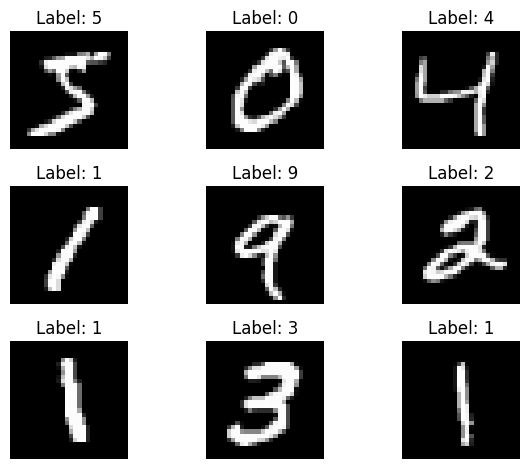

In [ ]:
# Lesson 2: Loading and Preprocessing the MNIST Dataset

# Import libraries
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Visualize some samples from the dataset
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
# Lesson 3: Building a Simple Neural Network

# Create a simple feedforward neural network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2541 - accuracy: 0.9287
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1126 - accuracy: 0.9661
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0786 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0574 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0441 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0361 - accuracy: 0.9889
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0279 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0224 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0186 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.01

In [ ]:
# Lesson 4: Building a Convolutional Neural Network (CNN)

# Reshape the data for the CNN
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Create a CNN model
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(x_train_cnn, y_train, epochs=10)

# Evaluate the CNN model
test_loss, test_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


Epoch 1/10
1875/1875 [==============================] - 83s 42ms/step - loss: 0.1378 - accuracy: 0.9582
Epoch 2/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0461 - accuracy: 0.9856
Epoch 3/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0331 - accuracy: 0.9894
Epoch 4/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0246 - accuracy: 0.9925
Epoch 5/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0184 - accuracy: 0.9941
Epoch 6/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0146 - accuracy: 0.9951
Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0110 - accuracy: 0.9963
Epoch 8/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0104 - accuracy: 0.9967
Epoch 9/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0079 - accuracy: 0.9973
Epoch 10/10
1875/1875 [==============================] - 57s 30m